## Métodos de Otimização: Métodos Heuristicos

### Enxame de Partículas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Enxame de Partículas' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
nFunc = 18
Qvar = 2
Qtind = 50
kmax = 150
countFunc = 0

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
x =np.zeros((Qtind,Qvar) , dtype = 'float')
fHist = []
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')

xmin[0] = -10; xmin[1] = -10
xmax[0] = 10; xmax[1] = 10

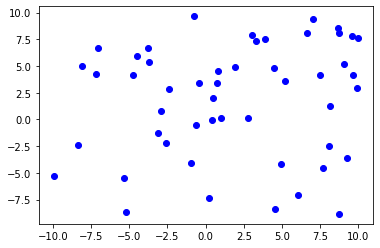

In [4]:
#criando a populacao inicial e suas funcoes objetivo
#o melhor individuo ja esta definido (pop == pi)

for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i],countFunc = f(pop[i,:],nFunc,Qvar,countFunc)

plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

In [5]:
minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]
print(fbest)

-9.51588885607517


In [6]:
x=pop.copy()
layout = "{0:.5f}"
k=0
while k < kmax:
    k += 1
    for i in range(0, Qtind):
        for j in range(0, Qvar):
            r1[j] = random.random()
            r2[j] = random.random()
            x[i,j] = x[i,j] + 2.*r1[j]*(pop[i,j]-x[i,j]) + 2.*r2[j]*(pbest[j]-x[i,j])
            x[i,j] = max(min(x[i,j],xmax[j]),xmin[j])

        fsol[i],countFunc = f(x[i,:],nFunc,Qvar,countFunc)
        
    for i in range(0, Qtind):
        if fsol[i] < fpop[i] :
            fpop[i]=fsol[i]
            pop[i,:]=x[i,:]
    
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    print(layout.format(pbest[0])+" "+layout.format(pbest[1])+" "+layout.format(fbest))
    fHist.append(fbest)
    

1.63790 6.03258 -10.31171
1.57904 6.31116 -10.62873
1.57904 6.31116 -10.62873
1.56168 6.29741 -10.63427
1.56575 6.29121 -10.63604
1.56690 6.28540 -10.63718
1.56629 6.28527 -10.63719
1.56733 6.27334 -10.63837
1.56760 6.27068 -10.63842
1.56747 6.26998 -10.63842
1.56747 6.26998 -10.63842
1.56746 6.27004 -10.63842
1.56745 6.27022 -10.63842
1.56747 6.27021 -10.63842
1.60913 3.25347 -10.77382
1.58914 3.15676 -10.84888
1.58914 3.15676 -10.84888
1.58914 3.15676 -10.84888
1.56171 3.15929 -10.85004
1.57523 3.12349 -10.85091
1.56407 3.13502 -10.85220
1.56278 3.13929 -10.85222
1.56278 3.13929 -10.85222
1.57283 3.14022 -10.85244
1.57283 3.14022 -10.85244
1.57108 3.13930 -10.85248
1.57020 3.13948 -10.85249
1.57012 3.13957 -10.85249
1.56972 3.13961 -10.85249
1.56972 3.13961 -10.85249
1.56976 3.13960 -10.85249
1.56980 3.13960 -10.85249
1.56981 3.13961 -10.85249
1.56982 3.13966 -10.85249
1.56983 3.13966 -10.85249
1.56983 3.13966 -10.85249
1.56983 3.13966 -10.85249
1.56983 3.13966 -10.85249
1.56983 3.13

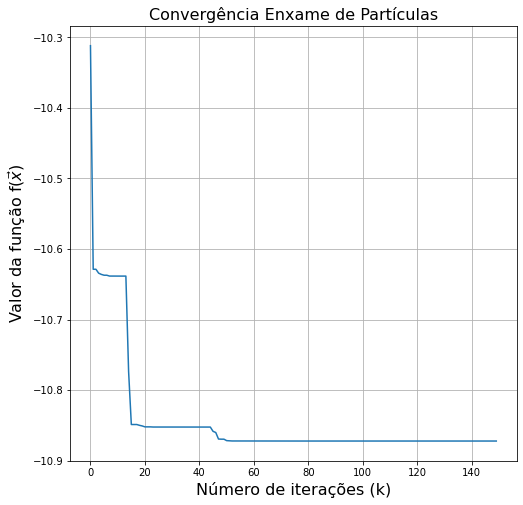

In [7]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [8]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  7550
Tempo de Execução = 162.2397816181183 s
